# Life Expectancy and GDP

The goal of this project was to examine GDP and Life Expectancy data from the World Health Organization and the World Bank from six different countries, and determine what (if any) relationships exist between GDP, Life Expectancy, and country.

### Objectives:
1. Examine whether an association between Life Expectancy and GDP exists.
2. Determine the range of Life Expectancy for each country, do countries with higher GDP have higher (older) Life Expectancy ranges?
3. How has GDP and Life Expectancy changed over time for each country? Is there a positive association between the two variables (GDP and Life Expectancy) for each country?

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Load the csv file using pandas and examine the dataframe.

df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())
print(df.Country.value_counts())
print(df.Year.value_counts())
print(df.Country.unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Chile                       16
China                       16
Germany

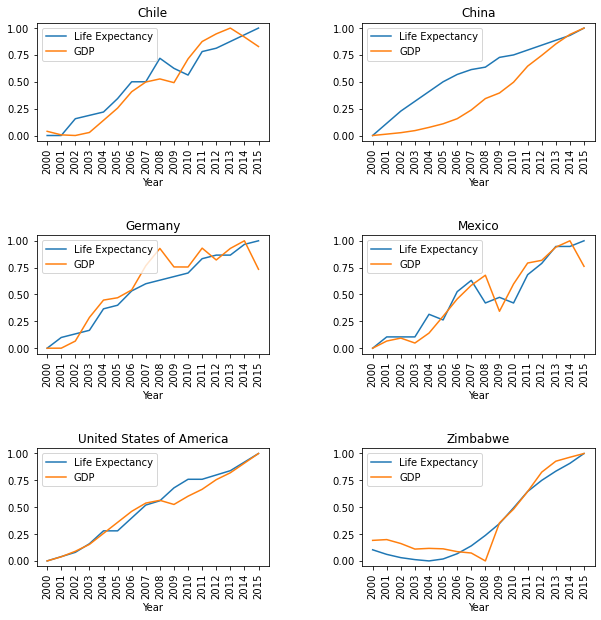

In [283]:
#Create a function that accepts dataframe as argument
#Function performs max-min normalization on 'Life Expectancy' and 'GDP columns'
#Function returns plots of both normalized columns against 'Year' column for each country


def life_vs_gdp(df):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(df.Country.unique())):
        countries = df.Country.unique()
        data = df[df.Country == countries[i]]
        scaler = MinMaxScaler()
        norm_data = scaler.fit_transform(data[['Life expectancy at birth (years)', 'GDP']])

        ax = plt.subplot(3, 2, (i+1))
        ax.set_xticks([x for x in data.Year])
        ax.set_xticklabels([x for x in data.Year], rotation=90)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
        plt.plot(data.Year, norm_data)
        plt.xlabel('Year')
        plt.title(countries[i])
        
        plt.legend(['Life Expectancy', 'GDP'], loc='upper left')
        
        plt.show
    
life_vs_gdp(df)

Based on our analysis above we see that GDP and Life Expectancy move over similar patterns from 2000-2015
Note that because we used max-min normalization we can't see anything about the MAGNITUDE of these changes/trajectories over time.

Chile's GDP increased by 211% comparing 2000 GDP to 2015 GDP.
China's GDP increased by 813% comparing 2000 GDP to 2015 GDP.
Germany's GDP increased by 73% comparing 2000 GDP to 2015 GDP.
Mexico's GDP increased by 69% comparing 2000 GDP to 2015 GDP.
United States of America's GDP increased by 76% comparing 2000 GDP to 2015 GDP.
Zimbabwe's GDP increased by 144% comparing 2000 GDP to 2015 GDP.
Chile's life expectancy increased by 4% comparing 2000 Life Expectancy to 2015 Life Expectancy.
China's life expectancy increased by 7% comparing 2000 Life Expectancy to 2015 Life Expectancy.
Germany's life expectancy increased by 4% comparing 2000 Life Expectancy to 2015 Life Expectancy.
Mexico's life expectancy increased by 3% comparing 2000 Life Expectancy to 2015 Life Expectancy.
United States of America's life expectancy increased by 4% comparing 2000 Life Expectancy to 2015 Life Expectancy.
Zimbabwe's life expectancy increased by 30% comparing 2000 Life Expectancy to 2015 Life Expectancy.


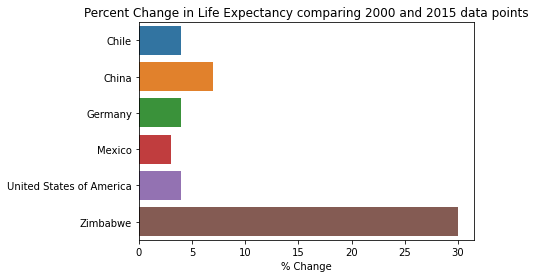

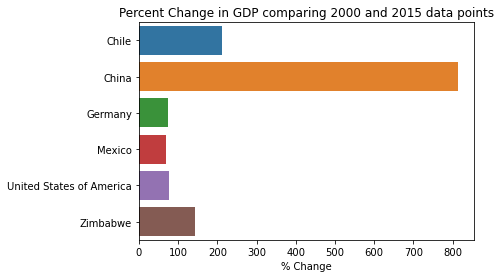

<Figure size 432x288 with 0 Axes>

In [19]:
#Define a function that takes a dataframe as an argument
#Function calculates percent change in GDP and Life Expectancy from 2000 to 2015 for each country.

def gdp_change(df):
    percentages = []
    for i in range(len(df.Country.unique())):
        countries = df.Country.unique()
        data = df[df.Country == countries[i]]
        
        gdp_start = int(data.GDP[data.Year == 2000])
        gdp_end = int(data.GDP[data.Year == 2015])
        
        perc_change = round((gdp_end - gdp_start)/gdp_start * 100)
        
        percentages.append(perc_change)
        
        print(countries[i] + "'s GDP increased by " + str(perc_change) + "% comparing 2000 GDP to 2015 GDP.")
        
    return percentages
        
gdp_change = gdp_change(df)


def life_change(df):
    percentages = []
    for i in range(len(df.Country.unique())):
        countries = df.Country.unique()
        data = df[df.Country == countries[i]]
        
        life_start = int(data['Life expectancy at birth (years)'][data.Year == 2000])
        life_end = int(data['Life expectancy at birth (years)'][data.Year == 2015])
        
        perc_change = round((life_end - life_start)/life_start * 100)
        
        percentages.append(perc_change)
        
        print(countries[i] + "'s life expectancy increased by " + str(perc_change) + "% comparing 2000 Life Expectancy to 2015 Life Expectancy.")
        
    return percentages
        
life_change = life_change(df)

countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

sns.barplot(x=life_change, y=countries)
plt.title('Percent Change in Life Expectancy comparing 2000 and 2015 data points')
plt.xlabel('% Change')
plt.show()
plt.clf()
sns.barplot(x=gdp_change, y=countries)
plt.title('Percent Change in GDP comparing 2000 and 2015 data points')
plt.xlabel('% Change')
plt.show()
plt.clf()

Although China's GDP grew the most by far over 2000-2015 compared to any other country, their life expectancy did not increase nearly as much as Zimbabwe's. Thus, it does not appear that the magnitude of GDP growth correlates with the magnitude of Life Expectancy increase.

However, perhaps there is an upper limit to increasing life expectancy beyond which it's difficult to further increase the expectancy, but below is relatively easier. For instance, easier to increase life expectancy from 45 years old to 60 years old (in the case of Zimbabwe), than trying to increase life expectancy from 70 years old to almost 80 years old (in the case of China).

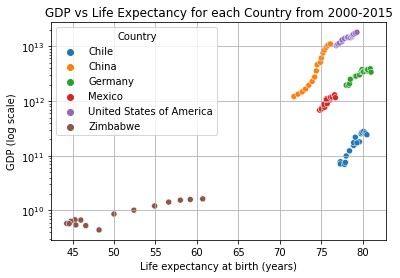

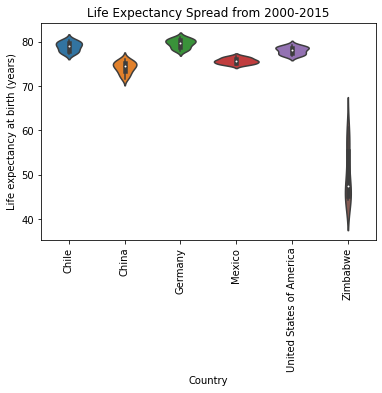

Zimbabwe's median life expectancy from 2000-2015 was 47 years old.


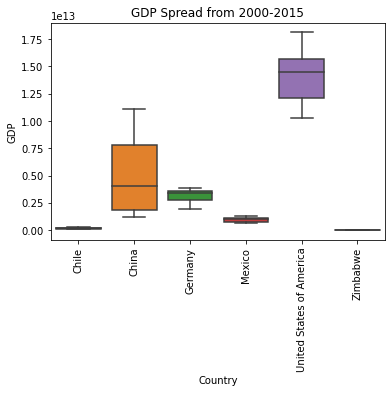

<Figure size 432x288 with 0 Axes>

In [28]:
#Plot GDP and Life Expectancy data (NOT normalized) against each other for each country
#Create violinplots for each country of GDP and Life Expectancy

df1 = df[df.Country != 'Zimbabwe']

scaler = MinMaxScaler()
norm_data = scaler.fit_transform(df[['Life expectancy at birth (years)', 'GDP']])

sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='GDP', hue='Country')
plt.title('GDP vs Life Expectancy for each Country from 2000-2015')
plt.grid()
plt.yscale('log')
plt.ylabel('GDP (log scale)')
plt.show()
plt.clf()
#Zimbabwe life expectency is very distributed, and is significantly less compared to the other countries.
#Let's try to examine life expectancy between the other countries without Zimbabwe

sns.violinplot(data=df, x='Country', y='Life expectancy at birth (years)')
plt.xticks(rotation=90)
plt.title('Life Expectancy Spread from 2000-2015')
plt.show()
plt.clf()

zimbabwe_median_life = np.median(df['Life expectancy at birth (years)'][df.Country == 'Zimbabwe'])

print("Zimbabwe's median life expectancy from 2000-2015 was " + str(round(zimbabwe_median_life)) + " years old.")

sns.boxplot(data=df, x='Country', y='GDP')
plt.xticks(rotation=90)
plt.title('GDP Spread from 2000-2015')
plt.show()
plt.clf()

The first graph above of GDP vs life expectancy highlights a few different features of the data
1. Zimbabwe had (and maintained) the lowest GDP out of all six countries. However, Zimbabwe's increase in life expectancy was the largest from around less than 45 years old to over 60 years old.
2. China's GDP grew the most over the fifteen years - nearly 10-fold what it was in 2000.
3. All countries experienced both GDP growth AND increase in life expectancy from 2000-2015

The violin and box plots re-emphasize the findings of the GDP vs. life expectancy plot, illustrating the range of life expectancy of Zimbabwe in the first plot and the range of GDP of China in the second one.

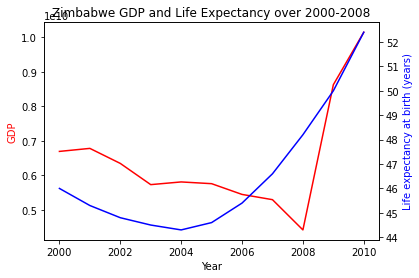

In [26]:
#Zimbabwe's GDP steadily DECLINED from 2000 to 2008.
#Let's examine GDP and Life Expectancy for Zimbabwe over this time period.

zim_decline = df[(df.Country == 'Zimbabwe') & (df.Year <= 2010)]

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color=color)
ax1.plot(zim_decline.Year, zim_decline.GDP, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Life expectancy at birth (years)', color=color)  # we already handled the x-label with ax1
ax2.plot(zim_decline.Year, zim_decline['Life expectancy at birth (years)'], color=color)
plt.title('Zimbabwe GDP and Life Expectancy over 2000-2008')
plt.show()

Interestingly, over this time period life expectancy ALSO decreased along with GDP. However, about four years PRIOR to the GDP bouncing back up (2008), life expectancy started to increase (beginning in 2004).

### Conclusions:
1. Both GDP and Life Expectancy follow similar upward trajectories from 2000-2015 for each country.
2. From 2000-2015, China's GDP increased the most, nearly 10-fold, out of all countries. Zimbabwe's life expectancy increased the most, nearly 150%, out of all the countries.
3. Growth in GDP is associated with increase of life expectancy for all countries examined. Magnitude of GDP growth is *not* a predictor of magnitude of life expectancy increase. The country with the lowest median GDP, Zimbabwe, also had the lowest median life expectancy (47 years old). All other countries had higher median life expectancies between 70 and 80 years old.
4. Zimbabwe's GDP declined from 2000-2008. Also during this time period Zimbabwe's life expectancy decreased following a similar path. However, life expectancy began to rise again (in 2004) *prior* to GDP growth in 2008.